<a href="https://colab.research.google.com/github/sysiphe0/dacon/blob/master/dacon_202002_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [14]:
def makeDataSet() :
  train = pd.read_csv("/content/train.csv")
  test = pd.read_csv("/content/test.csv")
  train = train.dropna()
  test = test.dropna()
  train_x = train.drop('type', axis=1, inplace=False)
  train_y = train['type']
  x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11)
  return x_train, x_test, y_train, y_test, test

In [15]:
x_train, x_test, y_train, y_test, test = makeDataSet()

In [18]:
x_test.info

<bound method DataFrame.info of             id  fiberID    psfMag_u  ...  modelMag_r  modelMag_i  modelMag_z
177412  177412      323 -235.135173  ...   21.232515   20.230481   20.029349
43180    43180      176   20.389093  ...   16.339237   14.897046   14.146092
90462    90462      264   20.077889  ...   19.384479   19.500665   19.650582
112524  112524      195   20.762379  ...   16.873918   16.459941   16.142141
70573    70573      406   21.485195  ...   20.510998   20.534900   20.432714
...        ...      ...         ...  ...         ...         ...         ...
54451    54451      618   23.577190  ...   21.376256   19.317815   18.183484
54358    54358      666   21.776168  ...   21.335139   21.323062   21.384400
6173      6173      458   17.317835  ...   16.140425   16.030511   16.035079
136132  136132      344   20.663643  ...   20.611765   20.358553   20.065190
75153    75153      487   22.641625  ...   21.417723   21.421694   20.975721

[39999 rows x 22 columns]>

In [11]:
dt_clf = DecisionTreeClassifier(random_state=99)

In [19]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [20]:
pred = dt_clf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy = accuracy_score(y_test, pred)

In [25]:
accuracy

0.8175204380109503

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

In [28]:
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose=1)

In [29]:
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=99,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             

In [30]:
grid_cv.best_score_

0.8480299099368107

In [31]:
grid_cv.best_params_

{'max_depth': 12}

In [33]:
corr = x_train.corr(method='pearson')

In [34]:
corr

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,1.000000,-0.000032,-0.001660,0.001060,-0.000664,-0.000616,0.002945,-0.001598,-0.001952,-0.001440,0.000979,0.000568,0.001815,0.001906,0.000251,0.000830,0.001098,-0.000501,0.000292,0.001748,-0.001044,0.002627
fiberID,-0.000032,1.000000,0.002973,0.004665,0.001416,0.005115,0.004985,0.003035,0.000763,0.004228,0.003314,0.005197,-0.002159,0.002846,0.003216,0.004900,0.001636,0.001350,0.002355,0.001301,0.005822,0.003739
psfMag_u,-0.001660,0.002973,1.000000,0.006060,0.006143,0.006464,0.006423,0.999779,0.001058,0.005832,0.007339,0.005949,-0.984567,0.005185,0.006408,0.006161,0.005139,0.004112,0.005209,0.007186,0.005251,0.006939
psfMag_g,0.001060,0.004665,0.006060,1.000000,0.682335,0.549209,0.603601,0.017265,0.124555,0.274116,0.617608,0.459512,0.123716,0.522482,0.414119,0.750666,0.524474,0.322144,0.753191,0.473614,0.495235,0.559828
psfMag_r,-0.000664,0.001416,0.006143,0.682335,1.000000,0.399012,0.338232,0.007229,0.090502,0.362861,0.497059,0.352231,0.094676,0.470511,0.518289,0.458384,0.727842,0.427847,0.622277,0.527207,0.544735,0.437632
psfMag_i,-0.000616,0.005115,0.006464,0.549209,0.399012,1.000000,0.579729,0.008207,0.111174,0.440716,0.508518,0.275083,0.065752,0.623712,0.549613,0.630863,0.359807,0.623470,0.618422,0.215359,0.542230,0.540329
psfMag_z,0.002945,0.004985,0.006423,0.603601,0.338232,0.579729,1.000000,0.010502,0.096405,0.224482,0.427337,0.423372,0.115706,0.494701,0.448112,0.678734,0.581327,0.163479,0.512257,0.244028,0.596869,0.592663
fiberMag_u,-0.001598,0.003035,0.999779,0.017265,0.007229,0.008207,0.010502,1.000000,0.001862,-0.000368,0.009326,0.007920,-0.983425,0.009272,0.006790,0.013380,0.007761,0.005908,0.010540,0.011725,0.000068,0.011714
fiberMag_g,-0.001952,0.000763,0.001058,0.124555,0.090502,0.111174,0.096405,0.001862,1.000000,0.046767,0.095612,0.070862,0.015883,0.073370,0.061165,0.118740,0.082484,0.076385,0.095166,0.061660,0.078042,0.095282
fiberMag_r,-0.001440,0.004228,0.005832,0.274116,0.362861,0.440716,0.224482,-0.000368,0.046767,1.000000,0.468858,0.273764,0.075044,0.366145,0.186118,0.187326,0.129566,0.325121,0.380462,0.280391,0.484622,0.334749


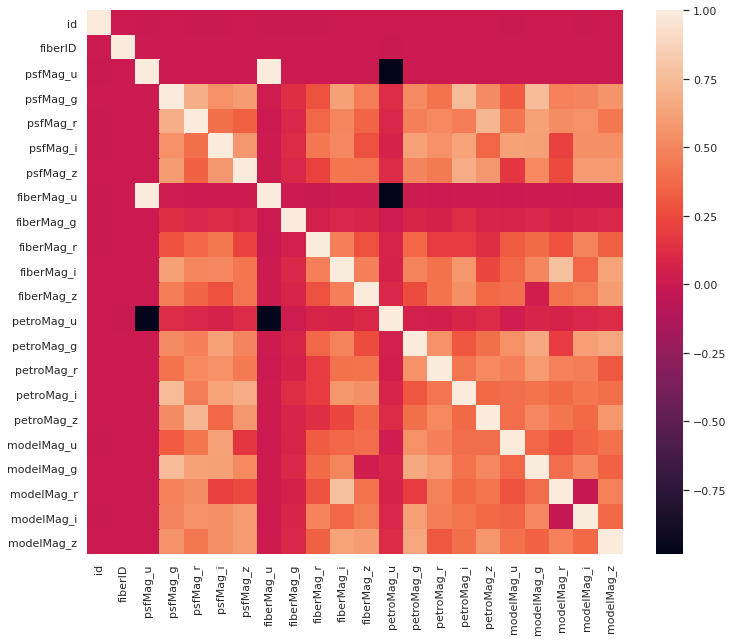

In [36]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr)

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [39]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

In [40]:
vo_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                

In [41]:
pred = vo_clf.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, pred)

In [43]:
accuracy

0.2452811320283007

In [44]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(x_train, y_train)
  pred = classifier.predict(x_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.2529
KNeighborsClassifier 정확도 : 0.2362


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_clf = RandomForestClassifier(random_state=99)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [48]:
pred = rf_clf.predict(x_test)

In [49]:
accuracy = accuracy_score(y_test, pred)

In [50]:
accuracy

0.8774219355483888

In [53]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

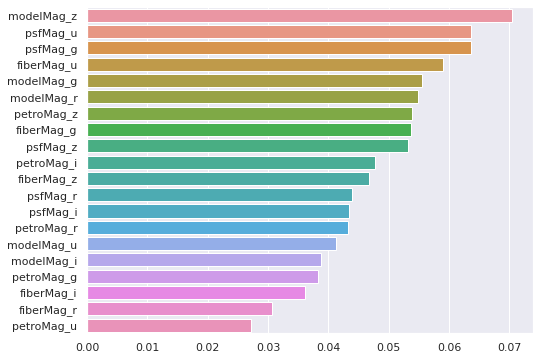

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
import time


In [58]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=99)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

gb_accuracy
time.time()-start_time

KeyboardInterrupt: ignored

In [59]:
import xgboost as xgb

In [60]:
from xgboost import XGBClassifier

In [61]:
from sklearn.metrics import log_loss

In [63]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_clf.fit(x_train, y_train)
pred = xgb_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
accuracy

KeyboardInterrupt: ignored